In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

import sys
sys.path.append('..')
from stonks.DataCatcher import db

In [2]:
def fetch_last(dbase, indent=4000):
    names = dbase.get_columns_names()
    data = dbase.get_data_from_DB(time.time() - indent, time.time(), pair_name='btcusdt')
    data = pd.DataFrame(data=data, columns=names)
    return data

In [3]:
dbase = db()
data = fetch_last(dbase)

Enter server address: 45.12.18.221
Enter login: hinser
Enter password: anime$girls131


In [4]:
import datetime

def plot(data):
    data['target'] = (data['depth_bid_price_1'] + data['depth_ask_price_1']) / 2.
    data['normal_time'] = data['time'].apply(datetime.datetime.fromtimestamp)
    plt.figure(figsize=(15, 5))
    plt.plot(data['normal_time'], data['target'])

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


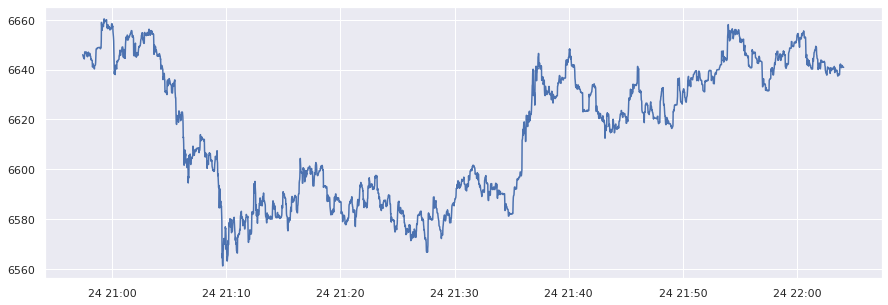

In [5]:
plot(data)

In [13]:
data.head()

,id,time,currency_pair,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,...,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,normal_time
0,15214803,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.816351,0.274528,0.30191,0.396000,0.257948,0.230490,0.296051,0.107962,6751.500,2020-03-24 13:10:05.781765
1,15214814,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.816351,0.274528,0.30191,0.396000,0.257948,0.126000,0.230490,0.296051,6751.235,2020-03-24 13:10:06.988898
2,15214825,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.882000,0.080467,0.30000,0.396000,0.126000,0.008340,0.189119,0.296051,6750.460,2020-03-24 13:10:08.160582
3,15214836,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.045304,0.882000,0.31000,0.816351,1.878336,0.118074,0.300000,0.396000,6750.360,2020-03-24 13:10:09.328001
4,15214847,1.585045e+09,btcusdt,693,6764.8,6753.72,6766.82,6750.0,88.204522,595872.443926,...,0.222217,0.045304,0.88200,0.310000,0.126000,1.878336,0.118074,0.300000,6750.360,2020-03-24 13:10:10.497584


In [15]:
shifted_update = data['kline_time_since_update'].shift(1)
data['new_kline'] = data['kline_time_since_update'] < shifted_update

In [27]:
kline_id = 0

def get_id(x):
    global kline_id
    if x:
        kline_id += 1
    return x * kline_id

data['kline_id'] = data['new_kline'].apply(get_id)

In [36]:
data['kline_id'].replace({0: np.NaN}, inplace=True)
data['kline_id'].ffill(inplace=True)

In [38]:
data.dropna(inplace=True)

In [39]:
data.drop('new_kline', axis=1, inplace=True)

In [41]:
data.drop('new_kline', axis=1, inplace=True)
data.drop(['time', 'id', 'currency_pair'], axis=1, inplace=True)
klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_open_price', 'kline_close_price',
       'kline_high_price', 'kline_low_price', 'kline_base_volume',
       'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

In [44]:
klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_open_price', 'kline_close_price',
       'kline_high_price', 'kline_low_price', 'kline_base_volume',
       'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

In [50]:
data[51:54]

,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,...,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,normal_time,kline_id
97,972,6753.75,6750.79,6755.27,6738.41,127.547477,8.604171e+05,45.293294,3.055822e+05,59457.123779,...,0.004020,0.025715,0.408,0.588667,0.277228,16.192191,0.002101,6708.330,2020-03-24 13:11:59.458678,1.0
98,3205,6750.79,6705.03,6752.25,6681.00,462.539670,3.105422e+06,171.110766,1.148707e+06,654.595947,...,0.388000,0.283325,1.500,0.392000,0.018808,0.043494,1.250000,6706.155,2020-03-24 13:12:00.655777,2.0
99,3205,6750.79,6705.03,6752.25,6681.00,462.539670,3.105422e+06,171.110766,1.148707e+06,1812.776123,...,0.044734,0.400000,0.200,0.100000,0.388000,0.002101,0.004000,6700.595,2020-03-24 13:12:01.813797,2.0


In [51]:
klines['kline_update_time'] = klines['kline_update_time'].apply(
    lambda x: datetime.datetime.fromtimestamp(x / 1000))

In [112]:
import ta

In [61]:
feat = ta.add_all_ta_features(klines, 'kline_open_price', 
                              'kline_high_price', 'kline_low_price', 'kline_close_price', 'kline_base_volume')

data.drop(['kline_trade_number', 'kline_open_price', 'kline_open_price',
       'kline_close_price', 'kline_high_price', 'kline_low_price',
       'kline_base_volume', 'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update',
       'kline_update_time'], axis=1, inplace=True)

feat.drop('kline_update_time', axis=1, inplace=True)

In [6]:
target = data.set_index('normal_time')['target']
target.head()

normal_time
2020-03-24 20:57:25.809335    6646.015
2020-03-24 20:57:26.981605    6645.715
2020-03-24 20:57:28.107799    6645.265
2020-03-24 20:57:29.273027    6645.005
2020-03-24 20:57:30.401691    6644.955
Name: target, dtype: float64

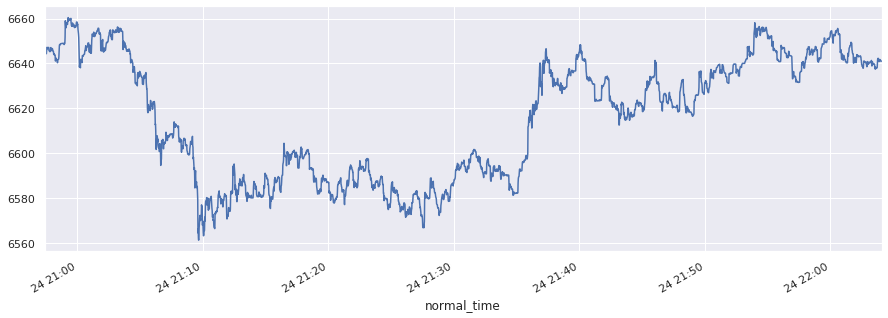

In [7]:
plt.figure(figsize=(15, 5))
target.plot()

In [62]:
mod = 0.01

a = target[:4000].values

diff_mat = a - a[:,None] * (1. + mod)
upper = (np.triu(diff_mat)>0).argmax(1)
np.place(upper, upper == 0, 10 ** 9)

In [63]:
diff_mat = a - a[:,None] * (1. - mod)
lower = (np.triu(diff_mat)<0).argmax(1)
np.place(lower, lower == 0, 10 ** 9)

In [64]:
to_up = (upper - lower) < 0
to_down = (upper - lower)> 0

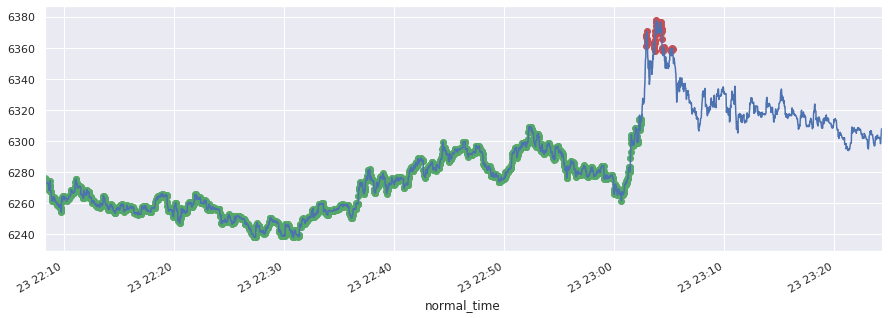

In [65]:
plt.figure(figsize=(15, 5))
target[:4000].plot()
plt.scatter(target[:4000][to_up].index, target[:4000][to_up], color='g')
plt.scatter(target[:4000][to_down].index, target[:4000][to_down], color='r')
plt.savefig('btc3.png')

In [20]:
data2 = fetch_last(dbase, 3600 * 24)

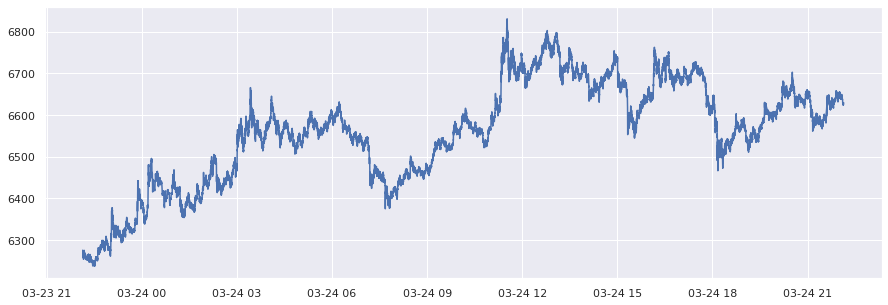

In [21]:
plot(data2)

In [22]:
target = data2.set_index('normal_time')['target']

In [29]:
y = pd.DataFrame(target)
y['normal_time'] = y.index

In [32]:
y

,target,normal_time,id
normal_time,,,
2020-03-23 22:08:16.376047,6275.845,2020-03-23 22:08:16.376047,0
2020-03-23 22:08:17.468746,6275.415,2020-03-23 22:08:17.468746,1
2020-03-23 22:08:18.614061,6275.365,2020-03-23 22:08:18.614061,2
2020-03-23 22:08:19.758219,6275.315,2020-03-23 22:08:19.758219,3
2020-03-23 22:08:20.904550,6275.325,2020-03-23 22:08:20.904550,4
...,...,...,...
2020-03-24 22:08:10.841265,6628.935,2020-03-24 22:08:10.841265,75285
2020-03-24 22:08:11.975659,6628.925,2020-03-24 22:08:11.975659,75286
2020-03-24 22:08:13.103745,6629.145,2020-03-24 22:08:13.103745,75287


In [31]:
y['id'] = range(y.shape[0])

In [41]:
z = y.copy()

In [48]:
y = z[:1000]

In [37]:
mod = 0.001

def foo(x):
    cur_up = y[x['normal_time']:][y['target'][x['normal_time']:] > x['target'] * (1 + mod)]['id'].values
    cur_down = y[x['normal_time']:][y['target'][x['normal_time']:] < x['target'] * (1 - mod)]['id'].values
    try:
        return cur_up[0] > cur_down[0]
    except:
        return False

In [49]:
%timeit df = y.apply(foo, axis=1)

1.71 s ± 58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [179]:
import random


mod = 0.01
res = pd.Series(index=target.index, data=-1)

for _ in range(5):
    print(_)
    period = random.randint(3000, 4000)
    start = 0
    while start < res.shape[0]:
        a = target[start:start + period].values

        diff_mat = a - a[:,None] * (1. + mod)
        upper = (np.triu(diff_mat)>0).argmax(1)
        np.place(upper, upper == 0, 10 ** 9)
        
        diff_mat = a - a[:,None] * (1. - mod)
        lower = (np.triu(diff_mat)<0).argmax(1)
        np.place(lower, lower == 0, 10 ** 9)
        
        res[target[start:start + period][upper < lower].index] = 1
        res[target[start:start + period][upper > lower].index] = 0
        start += period

0
1
2
3
4


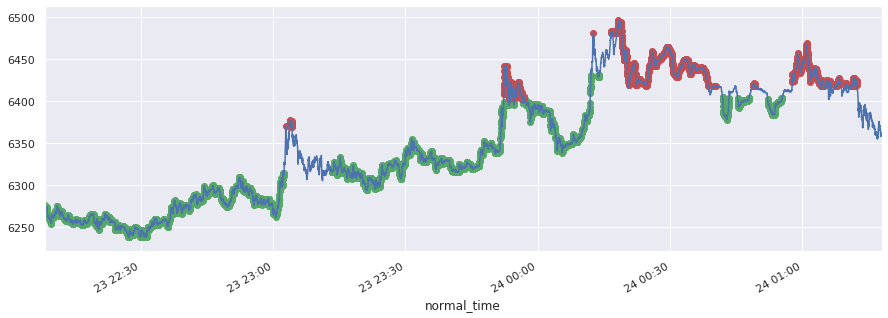

In [180]:
target1 = target[:10000]
res1 = res[:10000]

plt.figure(figsize=(15, 5))
target1.plot()
plt.scatter(target1[res1 == 1].index, target1[res1 == 1], color='g')
plt.scatter(target1[res1 == 0].index, target1[res1 == 0], color='r')

In [181]:
data2['state'] = res.reset_index(drop=True)

In [184]:
res.shape

(75290,)

In [185]:
target

normal_time
2020-03-23 22:08:16.376047    6275.845
2020-03-23 22:08:17.468746    6275.415
2020-03-23 22:08:18.614061    6275.365
2020-03-23 22:08:19.758219    6275.315
2020-03-23 22:08:20.904550    6275.325
                                ...   
2020-03-24 22:08:10.841265    6628.935
2020-03-24 22:08:11.975659    6628.925
2020-03-24 22:08:13.103745    6629.145
2020-03-24 22:08:14.224960    6629.155
2020-03-24 22:08:15.380395    6629.465
Name: target, Length: 75290, dtype: float64

In [186]:
data2.head()

,kline_trade_number,kline_open_price,kline_close_price,kline_high_price,kline_low_price,kline_base_volume,kline_quote_volume,kline_taker_base_volume,kline_taker_quote_volume,kline_time_since_update,...,depth_ask_quantity_13,depth_ask_quantity_14,depth_ask_quantity_15,depth_ask_quantity_16,depth_ask_quantity_17,depth_ask_quantity_18,depth_ask_quantity_19,depth_ask_quantity_20,target,state
normal_time,,,,,,,,,,,,,,,,,,,,,
2020-03-23 22:08:16.376047,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,16375.457275,...,0.952000,0.0276,0.250000,0.200000,0.544834,0.074155,0.119432,0.300000,6275.845,NaN
2020-03-23 22:08:17.468746,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,17468.337158,...,0.952000,0.0276,0.500085,0.200000,0.544834,0.074155,0.500086,0.119432,6275.415,NaN
2020-03-23 22:08:18.614061,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,18613.458740,...,0.952000,0.0276,0.600000,0.544834,0.074155,0.015434,0.119432,0.300000,6275.365,NaN
2020-03-23 22:08:19.758219,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,19756.402344,...,0.500075,0.2500,0.500079,0.200000,0.600000,0.544834,0.074155,0.015434,6275.315,NaN
2020-03-23 22:08:20.904550,437,6279.51,6277.42,6289.51,6277.36,52.541583,330128.506774,28.33892,178050.025286,20903.012695,...,0.102935,0.0276,0.500012,0.200000,0.250000,0.500079,0.600000,0.544834,6275.325,NaN


In [189]:
data2.drop(['id', 'time', 'currency_pair'], axis=1, inplace=True)
data2.set_index('normal_time', drop=True, inplace=True)

In [190]:
data2['state'].replace({-1: np.NaN}, inplace=True)
data2.dropna(inplace=True)

In [191]:
data = data2.copy()

shifted_update = data['kline_time_since_update'].shift(1)
data['new_kline'] = data['kline_time_since_update'] < shifted_update

kline_id = 0

def get_id(x):
    global kline_id
    if x:
        kline_id += 1
    return x * kline_id

data['kline_id'] = data['new_kline'].apply(get_id)

data['kline_id'].replace({0: np.NaN}, inplace=True)
data['kline_id'].ffill(inplace=True)

data.dropna(inplace=True)

data.drop('new_kline', axis=1, inplace=True)
klines = data[['kline_id', 'kline_trade_number', 'kline_open_price', 'kline_close_price',
       'kline_high_price', 'kline_low_price', 'kline_base_volume',
       'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update', 'kline_update_time']].groupby('kline_id').mean()

klines['kline_update_time'] = klines['kline_update_time'].apply(
    lambda x: datetime.datetime.fromtimestamp(x / 1000))

feat = ta.add_all_ta_features(klines, 'kline_open_price', 
                              'kline_high_price', 'kline_low_price', 'kline_close_price', 'kline_base_volume')

data.drop(['kline_trade_number', 'kline_open_price', 'kline_open_price',
       'kline_close_price', 'kline_high_price', 'kline_low_price',
       'kline_base_volume', 'kline_quote_volume', 'kline_taker_base_volume',
       'kline_taker_quote_volume', 'kline_time_since_update',
       'kline_update_time'], axis=1, inplace=True)

feat.drop('kline_update_time', axis=1, inplace=True)

IndexError: single positional indexer is out-of-bounds

In [137]:
data = data.merge(klines, on='kline_id')

In [138]:
data.fillna(0, inplace=True)

In [126]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [139]:
from sklearn.model_selection import train_test_split
X = data.drop('state', axis=1)
y = data['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)


In [141]:
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [142]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.59      0.31      0.40      9689
         1.0       0.51      0.78      0.62      9100

    accuracy                           0.53     18789
   macro avg       0.55      0.54      0.51     18789
weighted avg       0.55      0.53      0.51     18789



In [157]:
pd.Series(pred).value_counts()

1.0    13808
0.0     4981
dtype: int64

In [172]:
proba = model.predict_proba(X_test)
probas = pd.DataFrame(proba, columns=['minimum', 'maximum'], index=X_test.index)

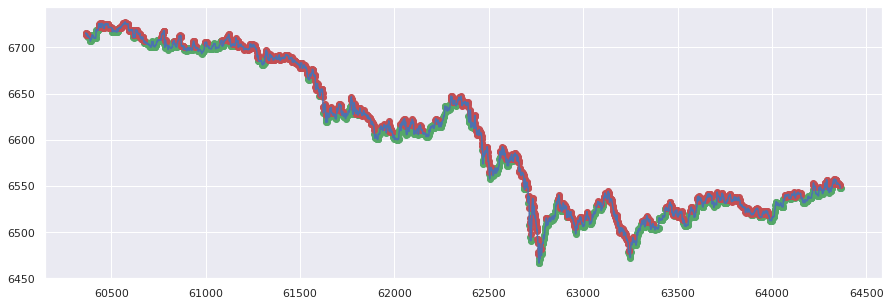

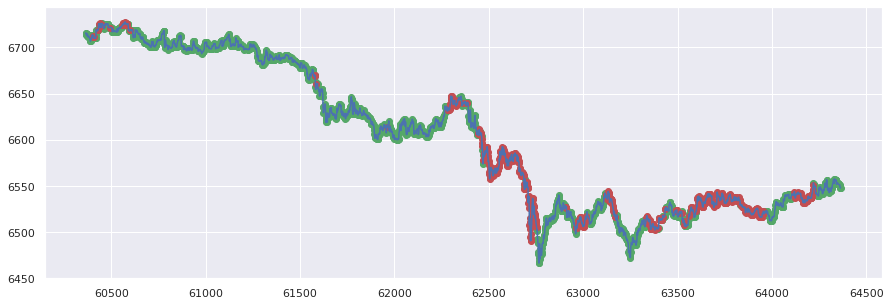

In [176]:
X_test1 = X_test[4000:8000]
probas1 = probas[4000:8000]

ups = probas1['maximum'] > 0.5
downs = probas1['minimum'] > 0.5

plt.figure(figsize=(15, 5))
plt.plot(X_test1.index, X_test1['target'])
plt.scatter(X_test1[y_test[4000:8000] == 1].index, X_test1[y_test[4000:8000] == 1]['target'], color='g')
plt.scatter(X_test1[y_test[4000:8000] == 0].index, X_test1[y_test[4000:8000] == 0]['target'], color='r')
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(X_test1.index, X_test1['target'])
plt.scatter(X_test1[ups].index, X_test1[ups]['target'], color='g')
plt.scatter(X_test1[downs].index, X_test1[downs]['target'], color='r')